In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start= '2020-01-01'
end='2025-01-01'

stock ='GOOG'
data=yf.download(stock,start,end)

print(data.head)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

<bound method NDFrame.head of Price            Close        High         Low        Open    Volume
Ticker            GOOG        GOOG        GOOG        GOOG      GOOG
Date                                                                
2020-01-02   68.046204   68.084520   66.761289   66.761289  28132000
2020-01-03   67.712280   68.301492   66.960045   67.075298  23728000
2020-01-06   69.381874   69.495829   67.181792   67.181792  34646000
2020-01-07   69.338585   69.818809   69.191280   69.567504  30054000
2020-01-08   69.884995   70.246282   69.214168   69.275872  30560000
...                ...         ...         ...         ...       ...
2024-12-24  197.345184  197.445061  194.975874  195.946768   6809800
2024-12-26  196.875717  197.934509  195.647106  196.516126   7907900
2024-12-27  193.819183  196.576052  191.753543  196.246426  14693000
2024-12-30  192.470734  193.559490  190.143383  190.647813  12209500
2024-12-31  190.223282  193.030082  189.364260  192.226005  14355200

[12

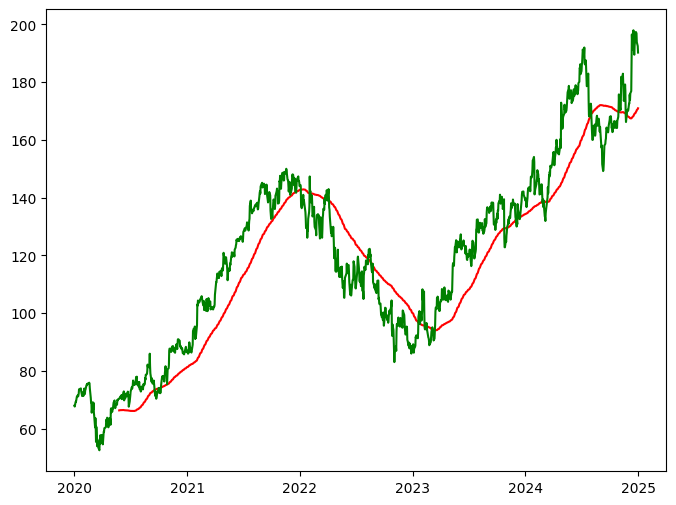

In [4]:
ma_100_days=data.Close.rolling(100).mean()

plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [5]:
ma_200_days=data.Close.rolling(200).mean()

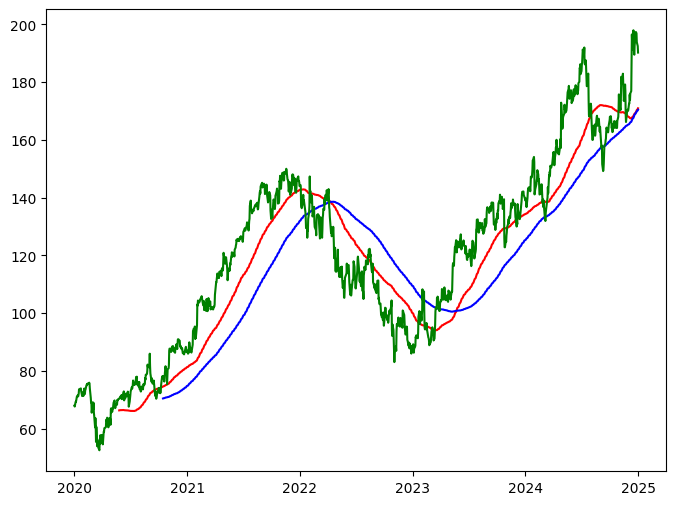

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [7]:
#80% of data is train data set
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
#remaining 20% of data is test data set
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [8]:
data_train.shape[0]

1006

In [9]:
data_test.shape[0]

252

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
data_train_scale = scaler.fit_transform(data_train)

In [12]:
x = []
y = []

#taking 100 days data as consideration
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [13]:
x, y = np.array(x), np.array(y)

In [14]:
#keras layers works as independent layers, in this o/p of one layer become i/p of another layer
from keras.layers import Dense, Dropout, LSTM
#Sequential will predict the data based on time series
from keras.models import Sequential

In [15]:

model = Sequential()
#units=no. of layers, relu a type of neural network parameter will calculate RNN network, return_seq will connect layes as o/p of one will beacome i/p of other
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))

#data is tight fitted,so it gives delay in time so we are giving loss of 20% data,so it will feed the main value
#generally it help as that model is not too overfitted
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

#dense is to predict the closing price of stocks
model.add(Dense(units =1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step - loss: 0.2567
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - loss: 0.0258
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - loss: 0.0176
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - loss: 0.0179
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - loss: 0.0160
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - loss: 0.0142
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - loss: 0.0133
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - loss: 0.0137
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - loss: 0.0135
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - loss: 0.0122
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - loss: 0.0124
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - loss: 0.0110
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 266ms/step - loss: 0.0115
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - loss: 0.0099
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 224m

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [19]:
past_100_days = data_train.tail(100)

In [20]:
data_test = pd.concat([past_100_days, data_test], ignore_index=False)

In [21]:
data_test_scale  =  scaler.fit_transform(data_test)

In [22]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [23]:
y_predict = model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step


In [24]:
scale =1/scaler.scale_

In [25]:
y_predict = y_predict*scale

In [26]:
y = y*scale

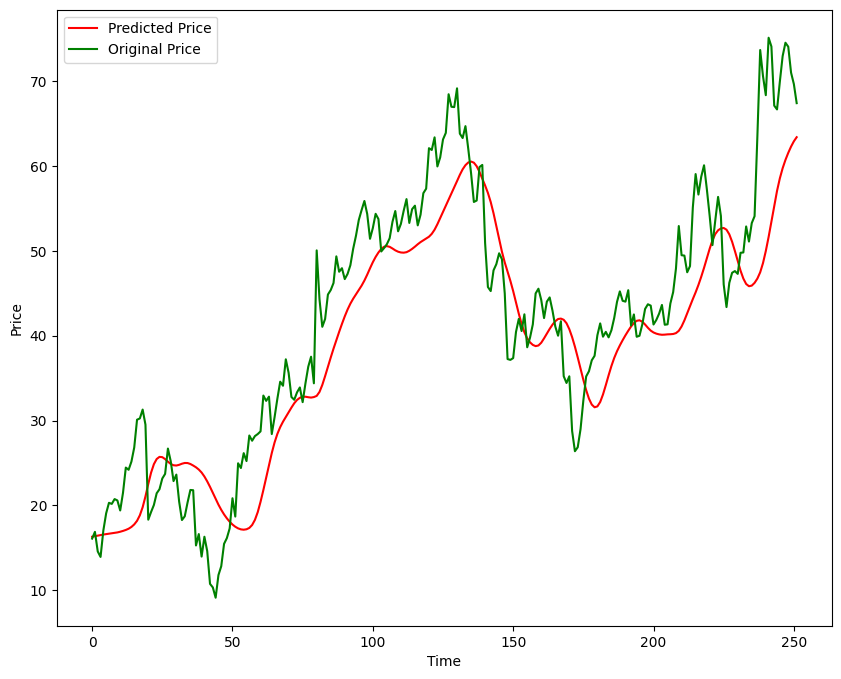

In [27]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
model.save('Stock Analysis Model.keras')